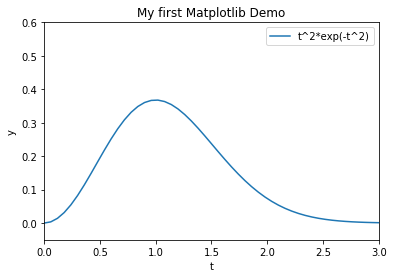

In [39]:
from numpy import *
from matplotlib.pyplot import *
def f(t):
    return t**2*exp(-t**2)
t = linspace(0, 3, 51) # 51 puntos entre 0 y 3
y = zeros(len(t)) # almacena y con elementos flotantes
for i in range(len(t)):
    y[i] = f(t[i])
plot(t, y)
xlabel('t')
ylabel('y')
legend(['t^2*exp(-t^2)'])
axis([0, 3, -0.05, 0.6])
title('My first Matplotlib Demo')
show()

y = f(t)

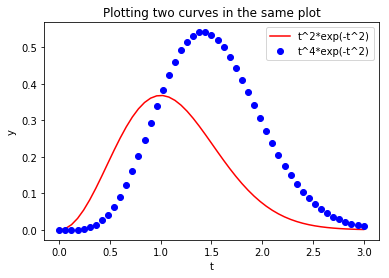

In [43]:
from numpy import *
from matplotlib.pyplot import *

def f1(t):
    return t**2*exp(-t**2)
def f2(t):
    return t**2*f1(t)

t = linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)

plot(t, y1, 'r-', t, y2, 'bo')
xlabel('t')
ylabel('y')
legend(['t^2*exp(-t^2)', 't^4*exp(-t^2)'])
title('Plotting two curves in the same plot')
show()

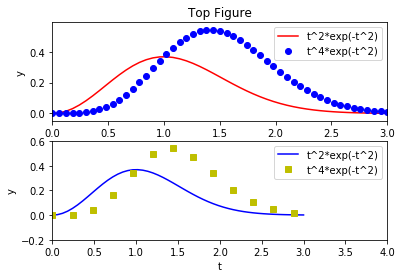

In [49]:
figure()
subplot(2, 1, 1)
t = linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)

plot(t, y1, 'r-', t, y2, 'bo')
xlabel('t')
ylabel('y')
axis([t[0], t[-1], min(y2)-0.05, max(y2)+0.05])
legend(['t^2*exp(-t^2)', 't^4*exp(-t^2)'])
title('Top Figure')

subplot(2,1,2)
t3 = t[::4]
y3 = f2(t3)

plot(t, y1, 'b-', t3, y3, 'ys')
xlabel('t')
ylabel('y')
axis([0, 4, -0.2, 0.6])
legend(['t^2*exp(-t^2)', 't^4*exp(-t^2)'])

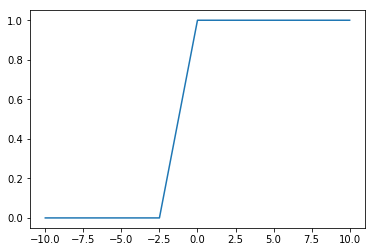

In [68]:
from numpy import *
from matplotlib.pyplot import *

def Hv(x):
    r = np.zeros(len(x), dtype=np.int)
    r[x >= 0] = 1
    return r

x = linspace(-10, 10, 9)
plot(x, Hv(x)) #, axis=[x[0], x[-1], -0.1, 1.1]

In [71]:
from numpy import *
from matplotlib.pyplot import *

def Nv2(x):
    condition1 = x < 0
    condition2 = np.logical_and(0 <= x, x < 1)
    condition3 = np.logical_and(1 <= x, x < 2)
    condition4 = x >= 2
    
    r = np.zeros(len(x))
    r[condition1] = 0.0
    r[condition2] = x[condition2]
    r[condition3] = 2-x[condition3]
    r[condition4] = 0.0
    return r

x = linspace(0, 2, 50)
plot(x, Nv1(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [74]:
"""Different vectorized versions of a hat function."""

import numpy as np

def N(x):
    if x < 0:
        return 0.0
    elif 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    elif x >= 2:
        return 0.0

def N_loop(x):
    r = np.zeros(len(x))
    for i in xrange(len(x)):
        r[i] = N(x[i])
    return r

N_vec = np.vectorize(N)
N_vec.func_name = 'N_vec'  # must be set manually

def Nv1(x):
    condition1 = x < 0
    condition2 = np.logical_and(0 <= x, x < 1)
    condition3 = np.logical_and(1 <= x, x < 2)
    condition4 = x >= 2

    r = np.where(condition1, 0.0, 0.0)
    r = np.where(condition2, x,   r)
    r = np.where(condition3, 2-x, r)
    r = np.where(condition4, 0.0, r)
    return r

def Nv2(x):
    condition1 = x < 0
    condition2 = np.logical_and(0 <= x, x < 1)
    condition3 = np.logical_and(1 <= x, x < 2)
    condition4 = x >= 2

    r = np.zeros(len(x))
    r[condition1] = 0.0
    r[condition2] = x[condition2]
    r[condition3] = 2-x[condition3]
    r[condition4] = 0.0
    return r

funcs = [N_loop, N_vec, Nv1, Nv2]
n = 1000000
x = np.linspace(-2, 4, n+1)
selected_index = n/2
import time
timings = {}
testvalues = {}
for func in funcs:
    name = func.func_name
    t0 = time.clock()
    r = func(x)
    t1 = time.clock()
    testvalues[name] = r[selected_index]
    timings[name] = t1 - t0

#from scitools.misc import hardware_info
#import pprint; pprint.pprint(hardware_info())
#pprint.pprint(timings)

# Test that the results are correct
#exact = N(x[selected_index])
#right = [testvalues[name] == exact for name in testvalues]
#if right != [True]*len(right):
    #print 'exact test:', exact, 'testvalues:', testvalues

AttributeError: 'function' object has no attribute 'func_name'

In [48]:
help(subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add a subplot to the current figure.
    
    Wrapper of `.Figure.add_subplot` with a difference in behavior
    explained in the notes section.
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args
        Either a 3-digit integer or three separate integers
        describing the position of the subplot. If the three
        integers are *nrows*, *ncols*, and *index* in order, the
        subplot will take the *index* position on a grid with *nrows*
        rows and *ncols* columns. *index* starts at 1 in the upper left
        corner and increases to the right.
    
        *pos* is a three digit integer, where the first digit is the
        number of rows, the second the number of columns, and the third
        the index of the subplot. i.e. fig.add_subplot(235) is the same as
       

In [1]:
from scitools.std import *
#import numpy as np
x0 = 100                      # initial amount
p = 5                         # interest rate
N = 4                         # number of years
index_set = range(N+1)
x = np.zeros(len(index_set))

# Compute solution
x[0] = x0
for n in index_set[1:]:
    x[n] = x[n-1] + (p/100.0)*x[n-1]
print(x)
plot(index_set, x, 'ro', xlabel='years', ylabel='amount')

ModuleNotFoundError: No module named 'scitools'

## Métodos de Euler hacia adelante y hacia atrás

In [3]:
import numpy as np

def ForwardEuler(f, U0, T, n):
    """Solve u'=f(u,t), u(0)=U0, with n steps until t=T."""
    t = np.zeros(n+1)
    u = np.zeros(n+1) # u[k] is the solution at time t[k]
    u[0] = U0
    t[0] = 0
    dt = T/float(n)
    for k in range(n):
        t[k+1] = t[k] + dt
        u[k+1] = u[k] + dt*f(u[k], t[k])
    return u, t

In [4]:
def f(u, t):
    return u

u, t = ForwardEuler(f, U0=1, T=4, n=20)

In [2]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
